# Visualizacion de datos

In [19]:

import pandas as pd
import numpy as np
import sys
from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set(font_scale = 1.5)
sns.set_context("poster")
sns.set(rc={"figure.figsize": (24.,12.)})
sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')

### Cargamos los datos limpios

In [21]:
df = pd.read_csv("datos_limpios.csv")

In [22]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,No,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,No,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,No,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,No,0


In [23]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,1.243557,0.010309
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441,6.856419,0.101140
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,1.000000


### Visulizamos los pairplots para encontrar alguna correlacion entre las variables según el tipo de gasolina

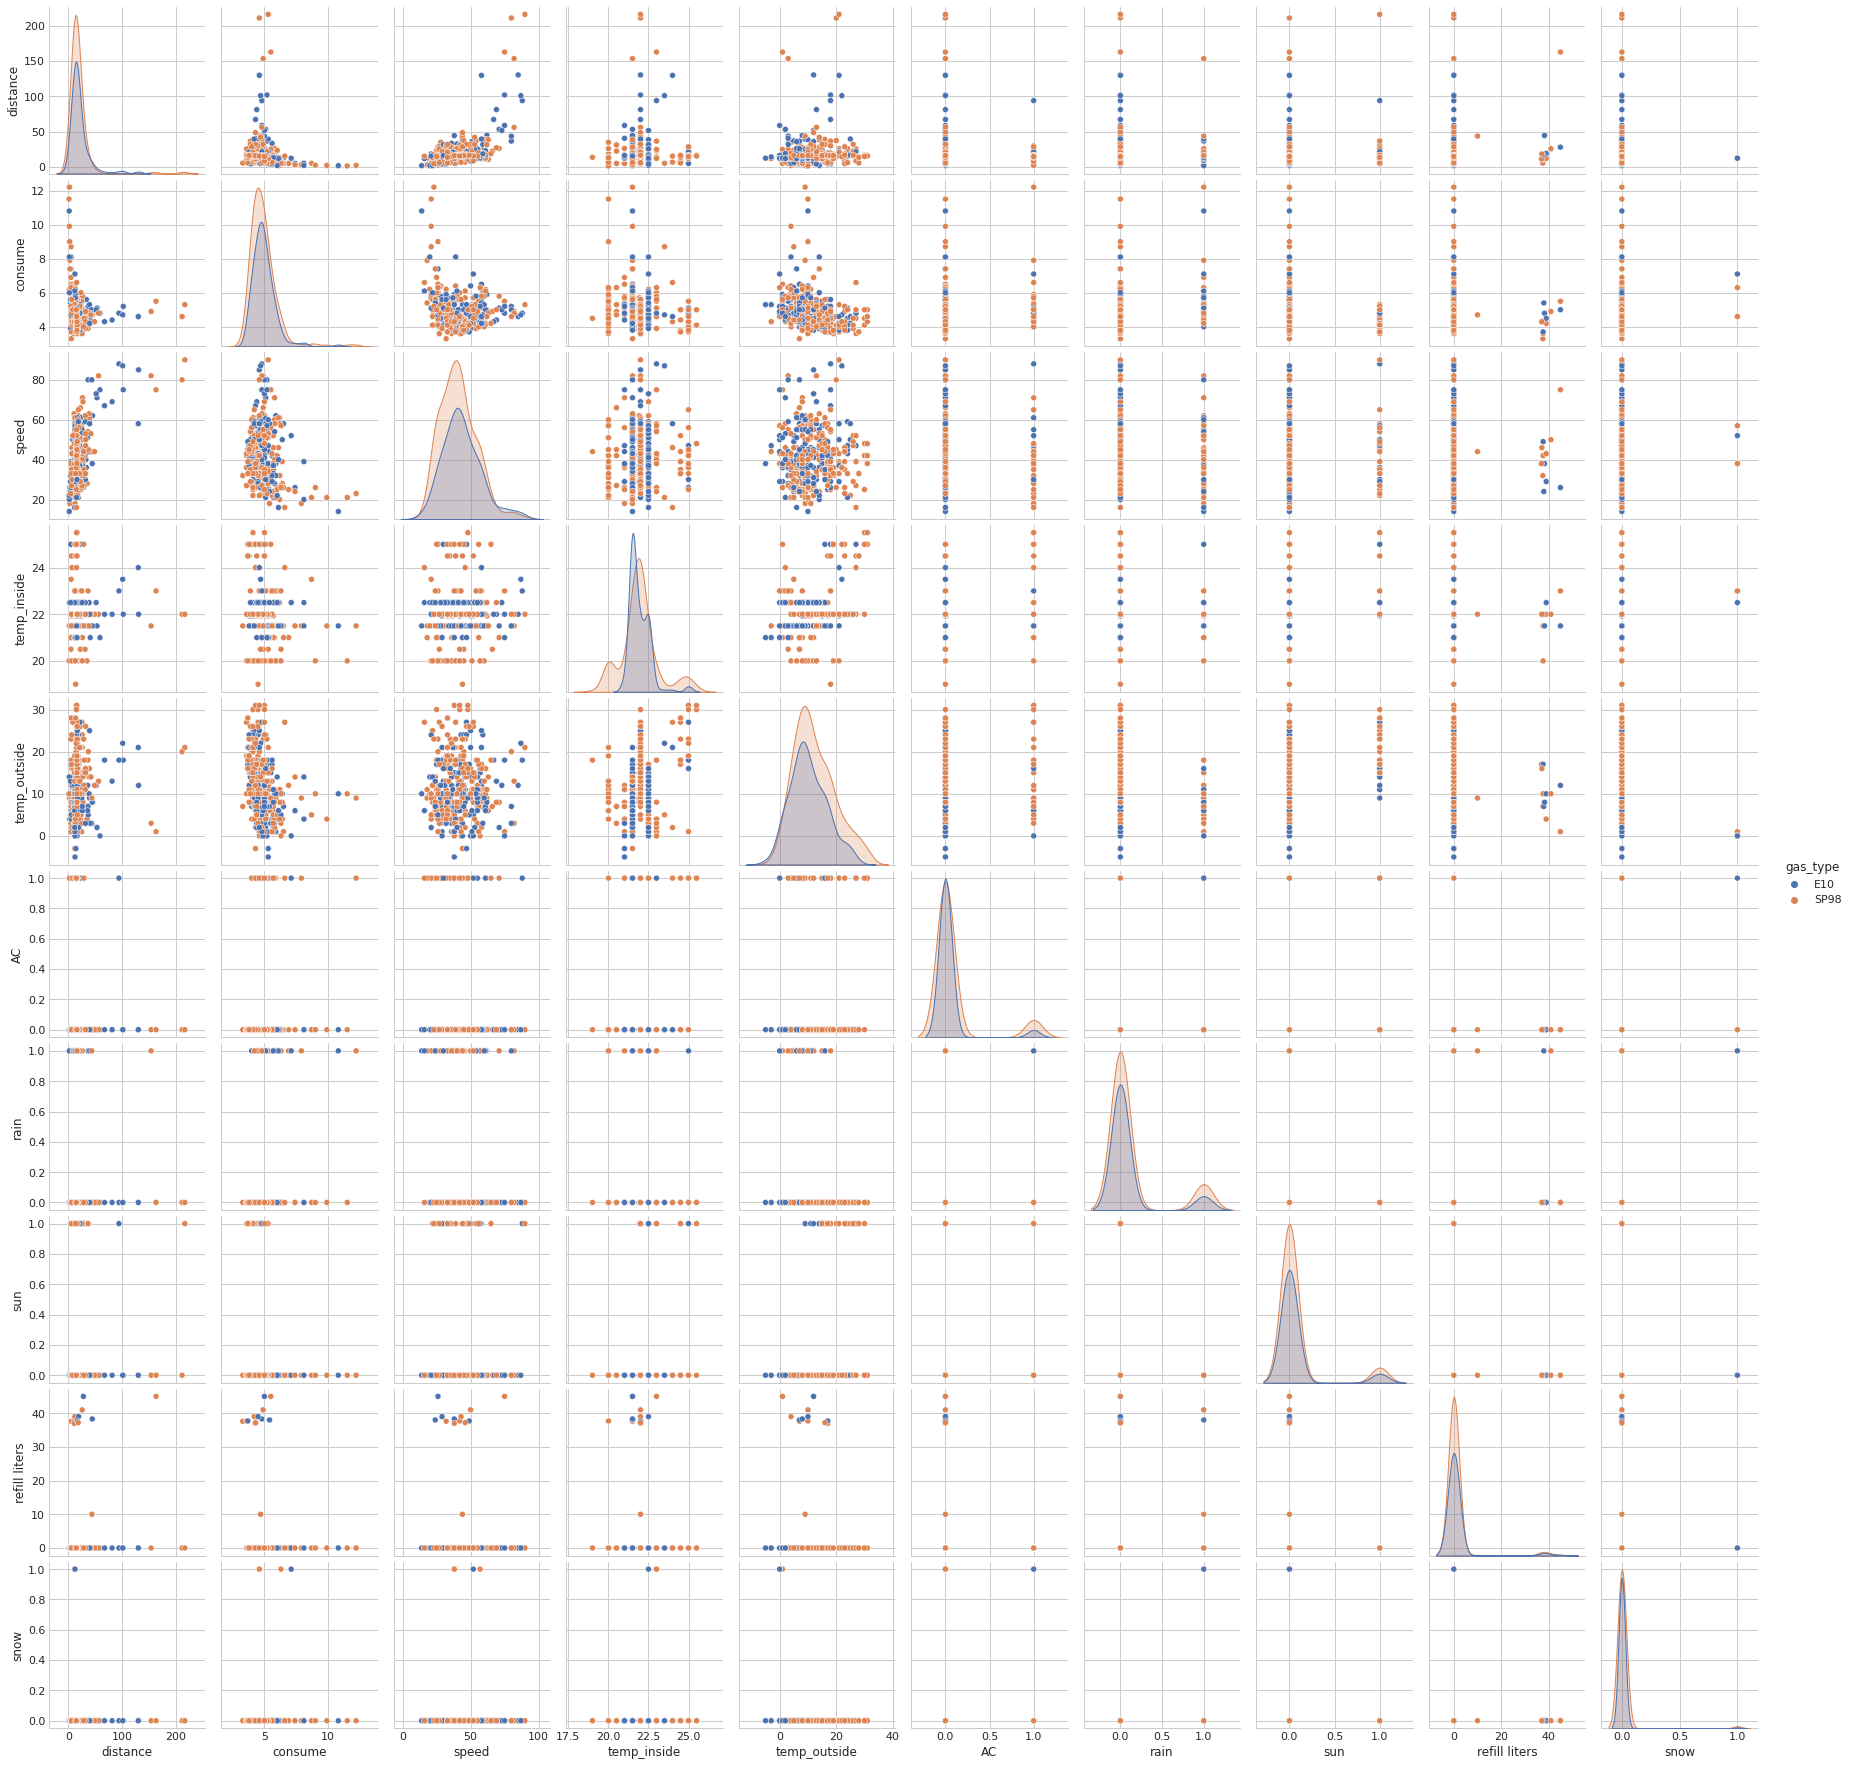

In [24]:
sns.pairplot(df, hue="gas_type")

### Saco la matriz de correlacion y la grafico para ver más relaciones

In [25]:
corr=df.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,-0.033712
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,0.072961
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,0.032481
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.097140
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,-0.162367
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.065984
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,0.271633
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.030600
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.018535
snow,-0.033712,0.072961,0.032481,0.097140,-0.162367,0.065984,0.271633,-0.030600,-0.018535,1.000000


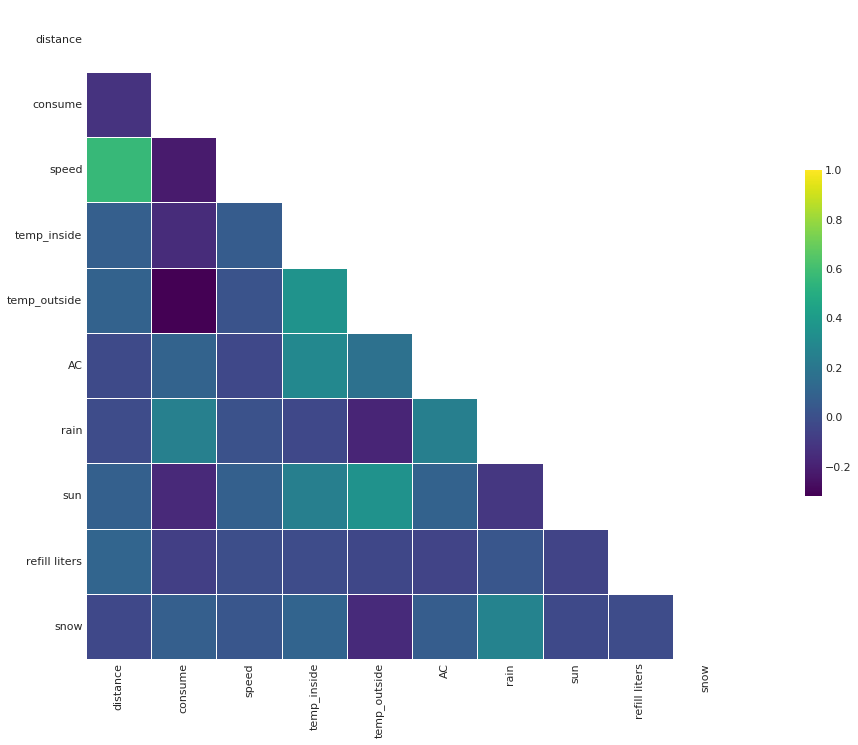

In [26]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

### Con la informacion anterior investigo posibles realciones visualmente

<AxesSubplot:xlabel='speed', ylabel='distance'>

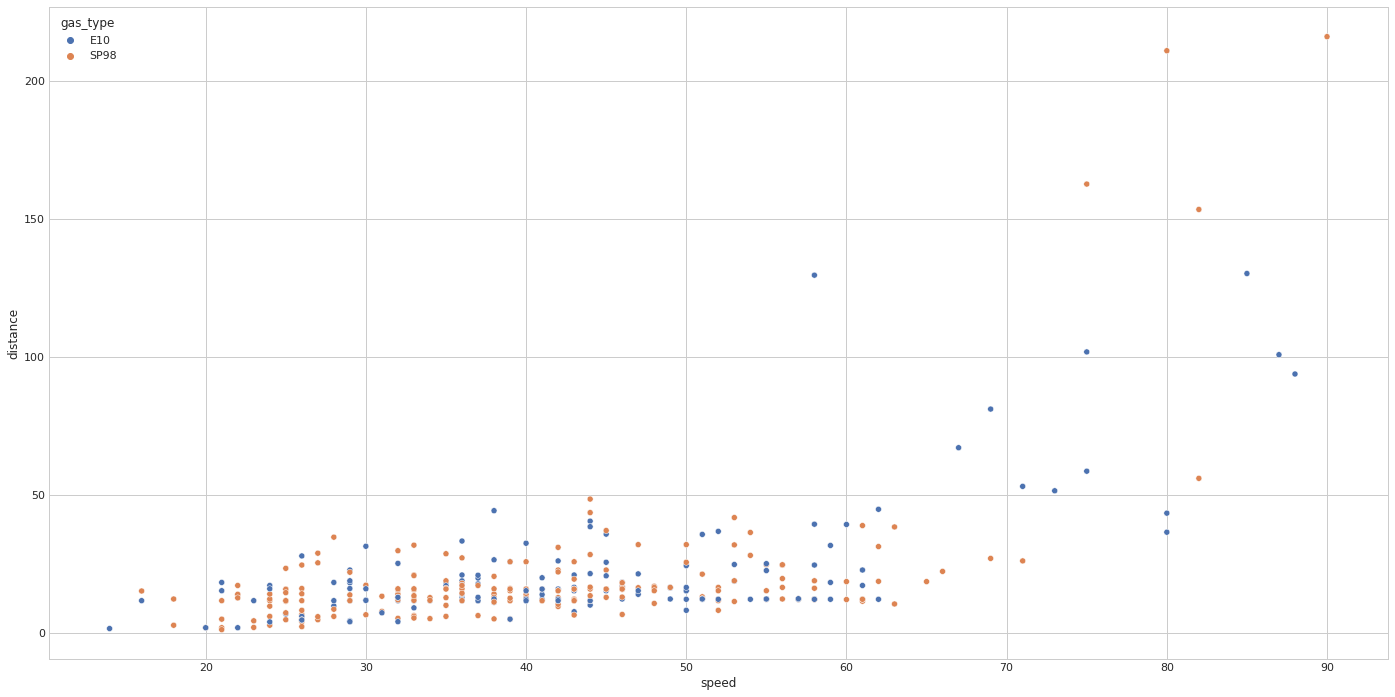

In [27]:
 sns.scatterplot(x="speed", y="distance", data=df, hue="gas_type")

<AxesSubplot:xlabel='speed', ylabel='distance'>

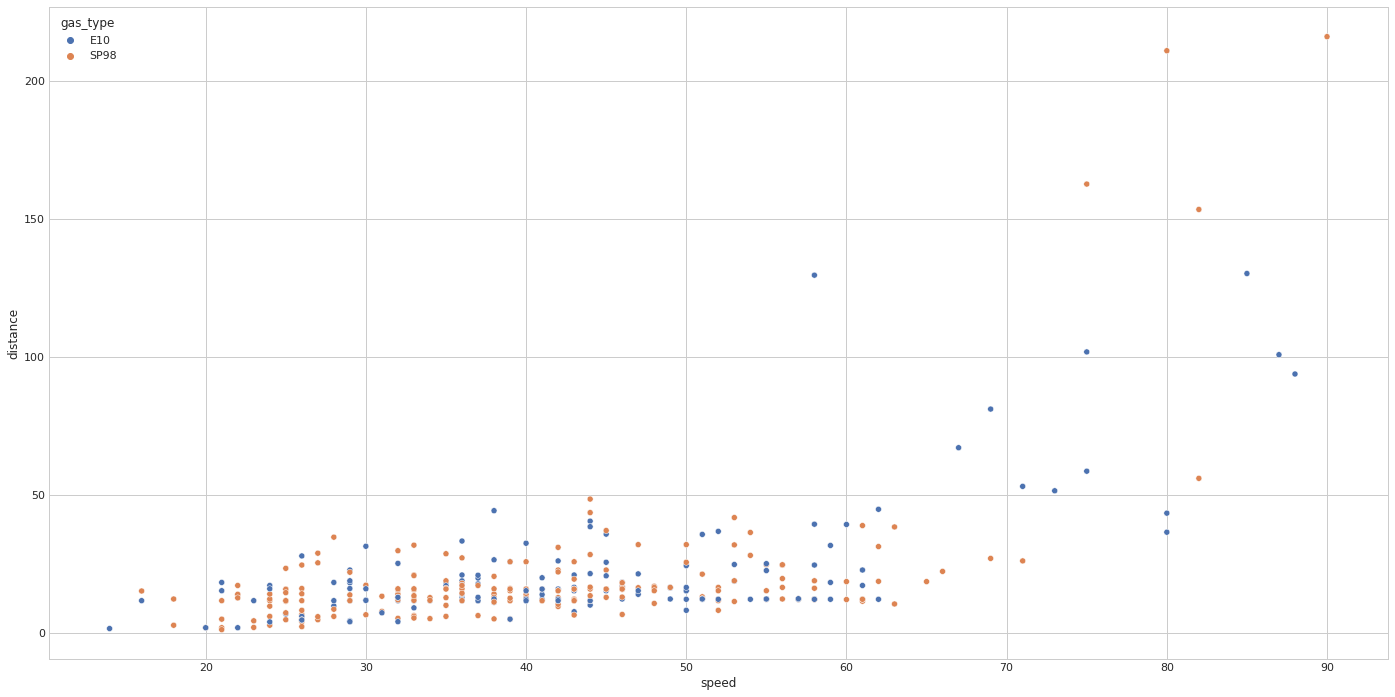

In [28]:
sns.scatterplot(x="speed", y="distance", data=df, hue="gas_type")

<AxesSubplot:xlabel='consume', ylabel='Count'>

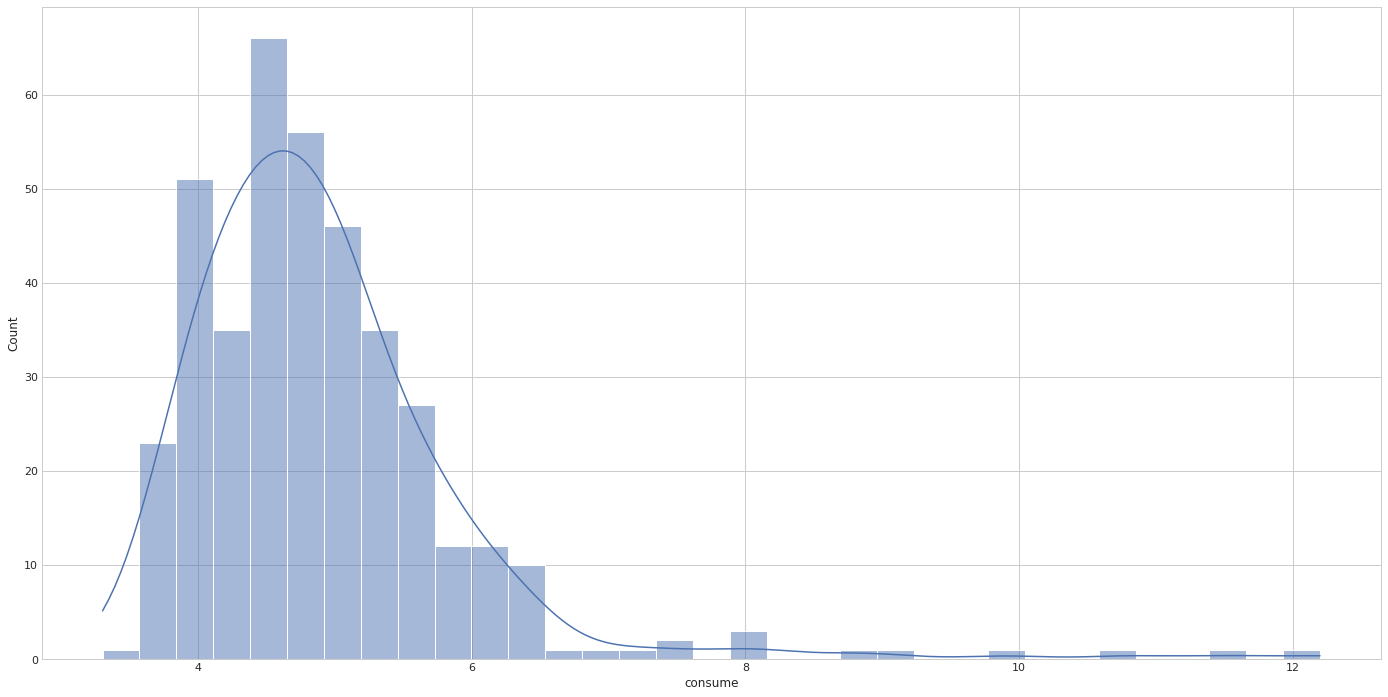

In [29]:
sns.histplot(x=df.consume, kde=True)

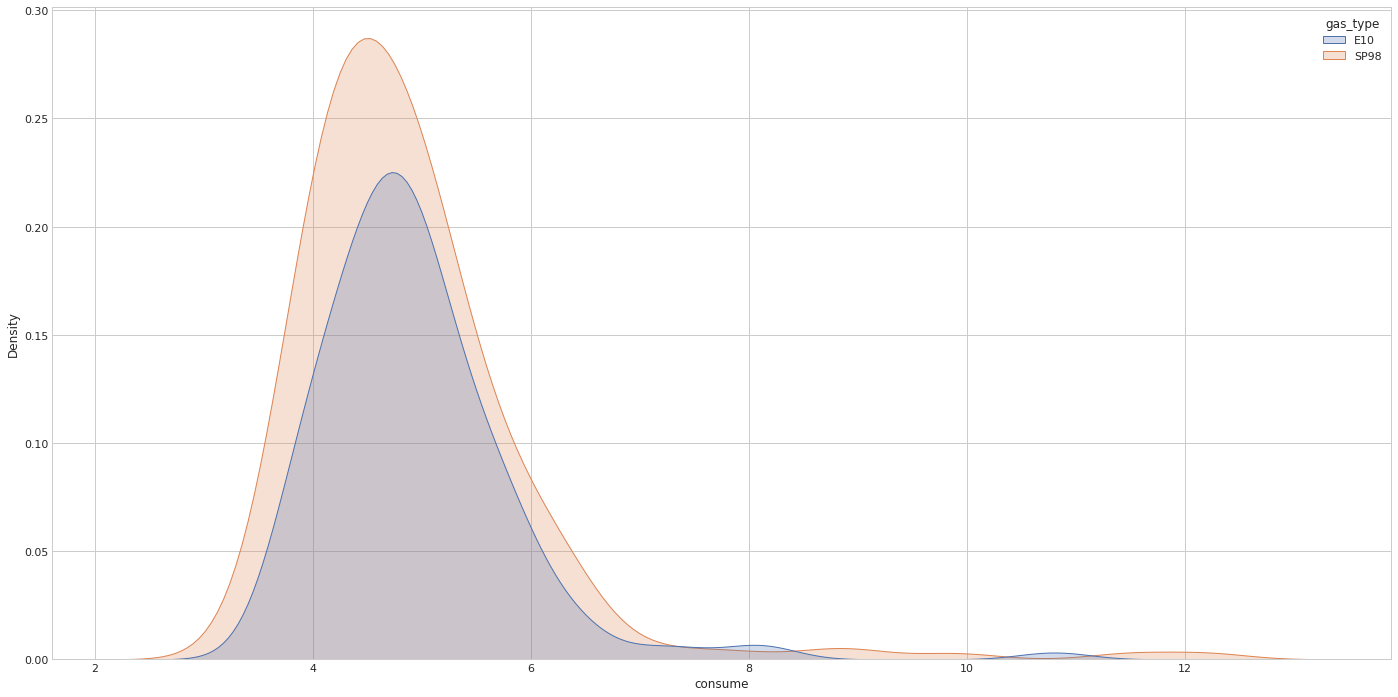

In [30]:
sns.kdeplot(x=df.consume, hue=df.gas_type, fill=True);

### A todas luces esta es la grafica más signifivativa en cuanto a consumo comparando los dos tipos de combustible, el cosumo de SP89 es sensiblemente mayor en todas las circunstancias independiente mente de los demás condicionantes.

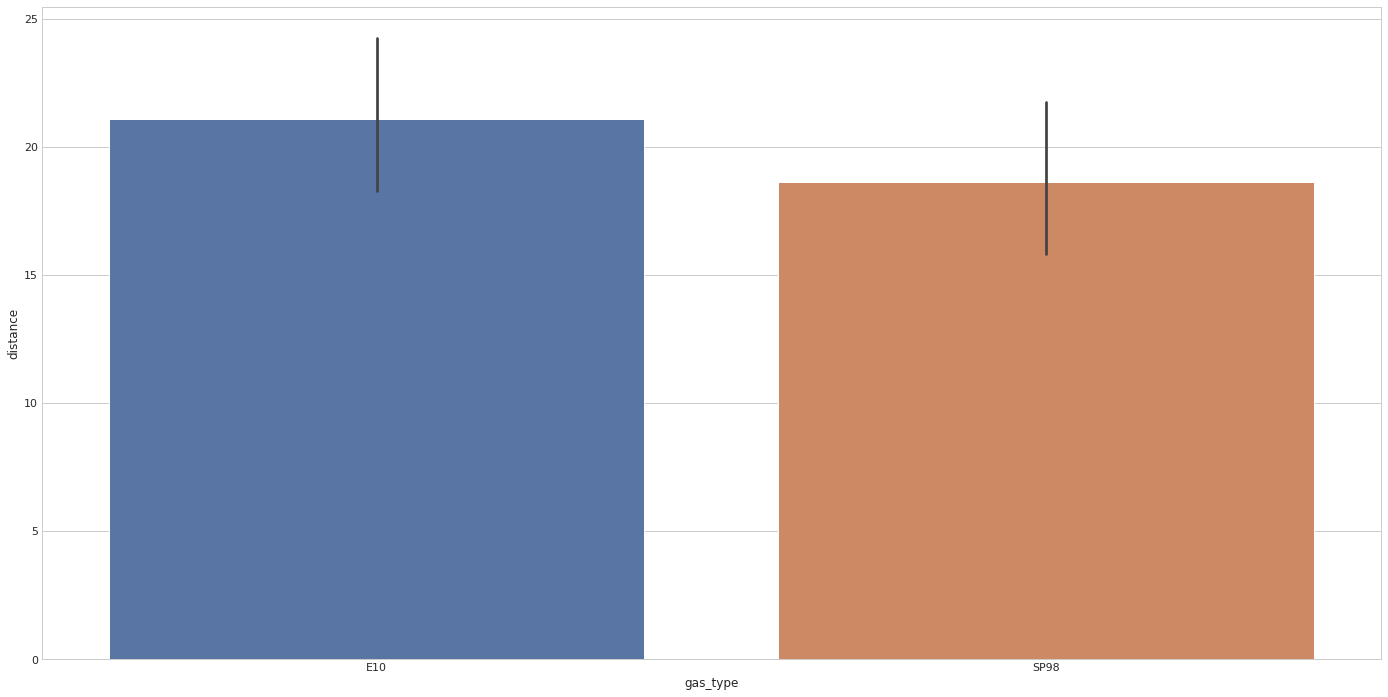

In [31]:
sns.barplot(x="gas_type", y="distance", data=df);

Esta grafica demuestra que con gaso E10 se recorre una mayor distancia


<AxesSubplot:xlabel='speed', ylabel='Count'>

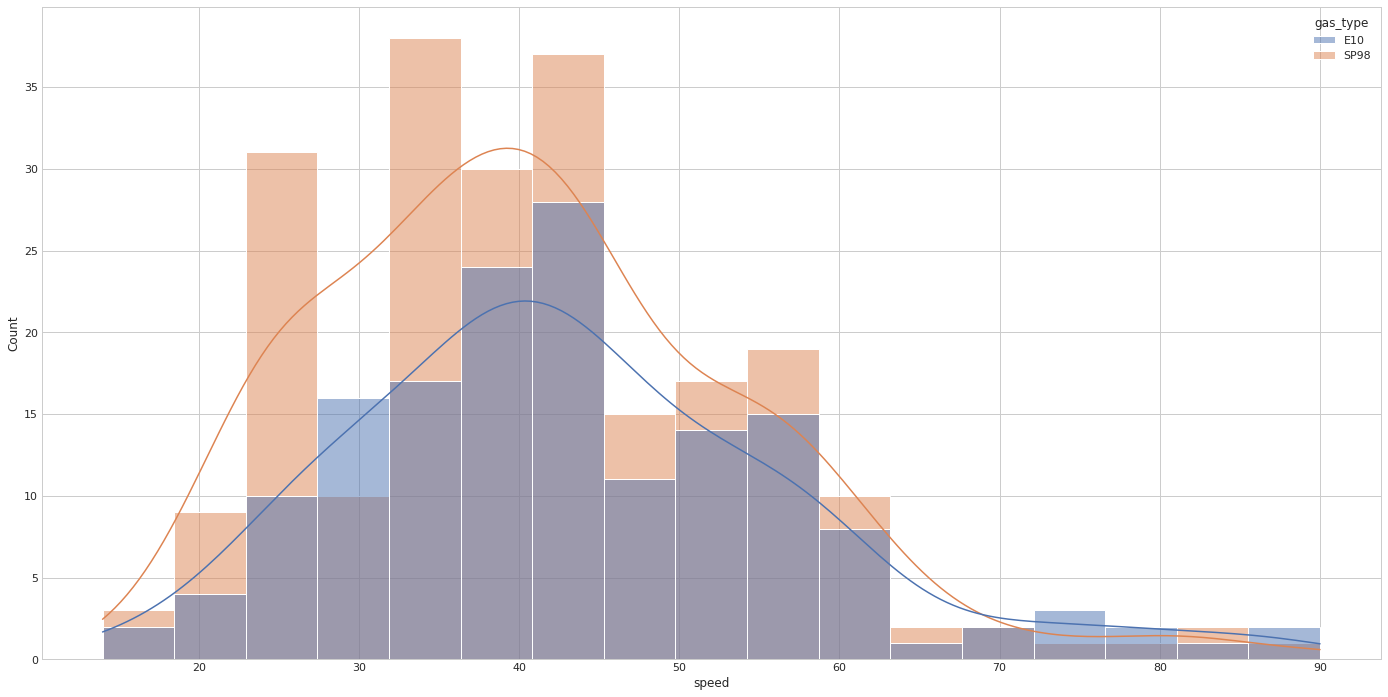

In [32]:
sns.histplot(data=df, x="speed", hue="gas_type",kde=True)

### como contrapartida los coches con SP95 parecen ser mucho más rápidos

# Estudio de la distancia recorrida 

<AxesSubplot:xlabel='distance', ylabel='Density'>

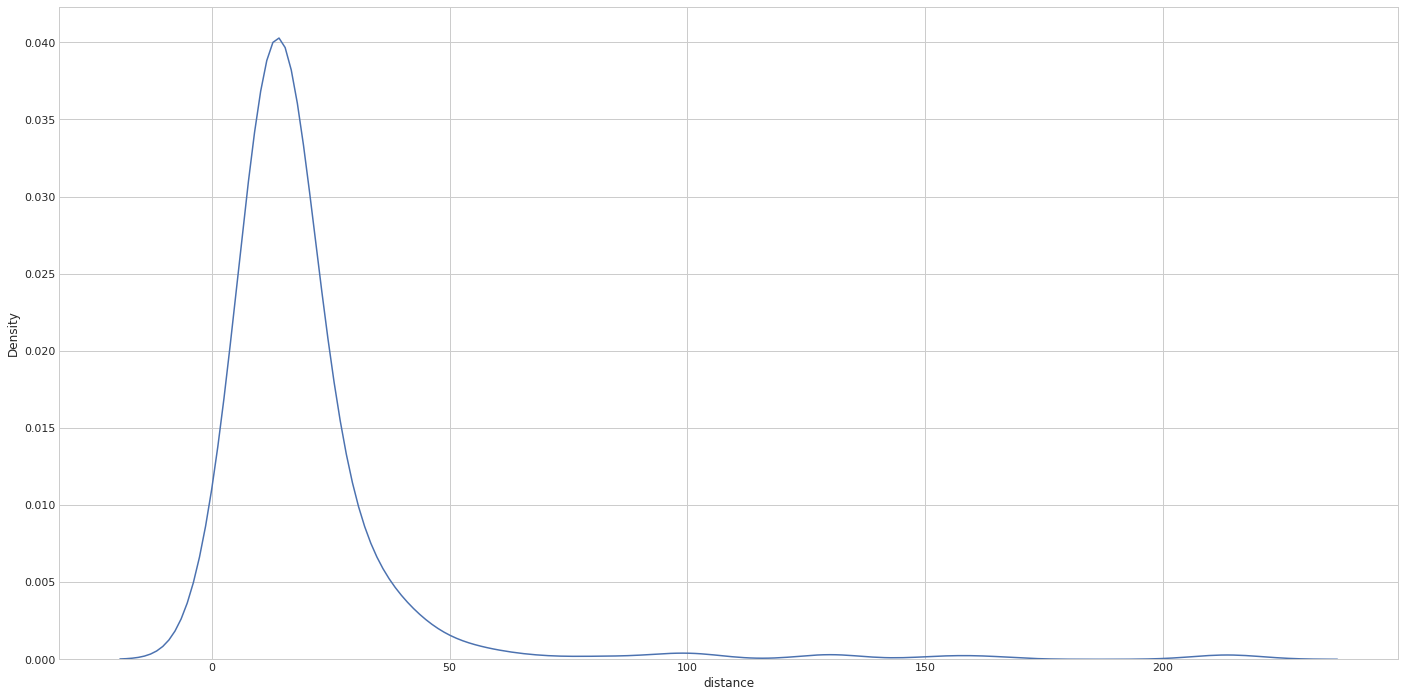

In [33]:
sns.kdeplot(x=df.distance)

In [34]:
df[df.distance>50]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow
55,153.5,4.9,82,21.5,3,SP98,0,1,0,0.0,No,0
106,162.7,5.5,75,23.0,1,SP98,0,0,0,45.0,SP98,0
162,53.2,5.1,71,21.5,2,E10,0,0,0,0.0,No,0
178,58.7,4.8,75,21.0,0,E10,0,0,0,0.0,No,0
185,51.6,5.0,73,22.5,12,E10,0,0,0,0.0,No,0
188,81.2,4.4,69,22.0,13,E10,0,0,0,0.0,No,0
189,130.3,4.6,85,22.0,12,E10,0,0,0,0.0,No,0
190,67.2,4.3,67,22.0,18,E10,0,0,0,0.0,No,0
193,56.1,4.8,82,22.0,13,SP98,0,0,0,0.0,No,0
272,101.9,5.2,75,22.0,18,E10,0,0,0,0.0,No,0
